In [7]:
import numpy as np
import pandas as pd
import kagglehub
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
path = kagglehub.dataset_download("johnsmith88/heart-disease-dataset")

print("Path to dataset files:", path)
print(os.listdir(path))

Path to dataset files: /kaggle/input/heart-disease-dataset
['heart.csv']


In [9]:
df = pd.read_csv('/kaggle/input/heart-disease-dataset/heart.csv')

In [10]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [25]:
df.shape

(302, 14)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [12]:
df.isnull().sum() #no null values

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [13]:
df.duplicated().sum() #duplicated values are their

np.int64(723)

In [14]:
df.drop_duplicates(inplace = True) #deleting the duplicated values

<Axes: >

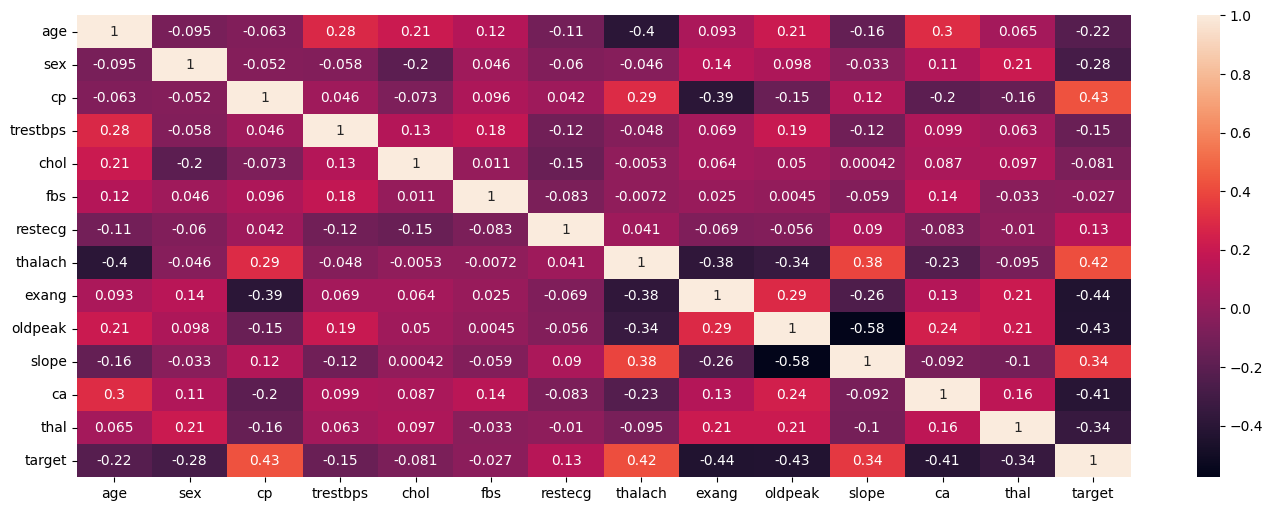

In [15]:
plt.figure(figsize = (17,6))
sns.heatmap(df.corr(),annot=True) #finding correlation between target and other columns so to see impact

In [17]:
from sklearn.model_selection import train_test_split #importing test train split

In [18]:
x_train,x_test,y_train,y_test = train_test_split(df.drop('target',axis=1),df['target'],test_size=0.2,random_state=2) #giving label and data

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test) #scaling the values so that values are in one array

In [44]:
x_train

array([[-0.749825  ,  0.6917569 , -0.00400263, ..., -2.29129794,
        -0.71592758,  1.12727885],
       [ 0.58875148, -1.44559455,  1.92526339, ...,  0.98587003,
        -0.71592758, -0.53943405],
       [ 1.81577993, -1.44559455, -0.96863563, ..., -0.65271395,
        -0.71592758, -0.53943405],
       ...,
       [-0.30363284,  0.6917569 , -0.00400263, ...,  0.98587003,
         0.27000697, -0.53943405],
       [-0.41518088, -1.44559455,  0.96063038, ...,  0.98587003,
         0.27000697, -0.53943405],
       [-0.08053676,  0.6917569 ,  0.96063038, ...,  0.98587003,
        -0.71592758,  1.12727885]])

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train) #fitting the model and seting k at 3

KNeighborsClassifier(n_neighbors=3)

In [23]:
from sklearn.metrics import accuracy_score
y_predict = knn.predict(x_test)
accuracy_score(y_test,y_predict) #getting the accuracy score

0.7868852459016393

In [26]:
scores = []
for i in range(1,16):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_predict = knn.predict(x_test)
    scores.append(accuracy_score(y_test,y_predict))  #finding the best k value

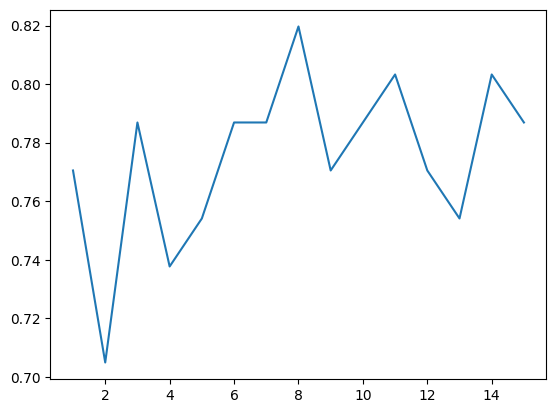

In [27]:
plt.plot(range(1,16),scores) #ploting to get best k value which is 7,8

In [30]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(x_train,y_train) #here using a even value gives best result at 81 but yet it is even so

KNeighborsClassifier(n_neighbors=8)

In [31]:
from sklearn.metrics import accuracy_score
y_predict = knn.predict(x_test)
accuracy_score(y_test,y_predict)

0.819672131147541

Now lets drop the columns having less correlation to see if we get good accuracy

In [32]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


<Axes: >

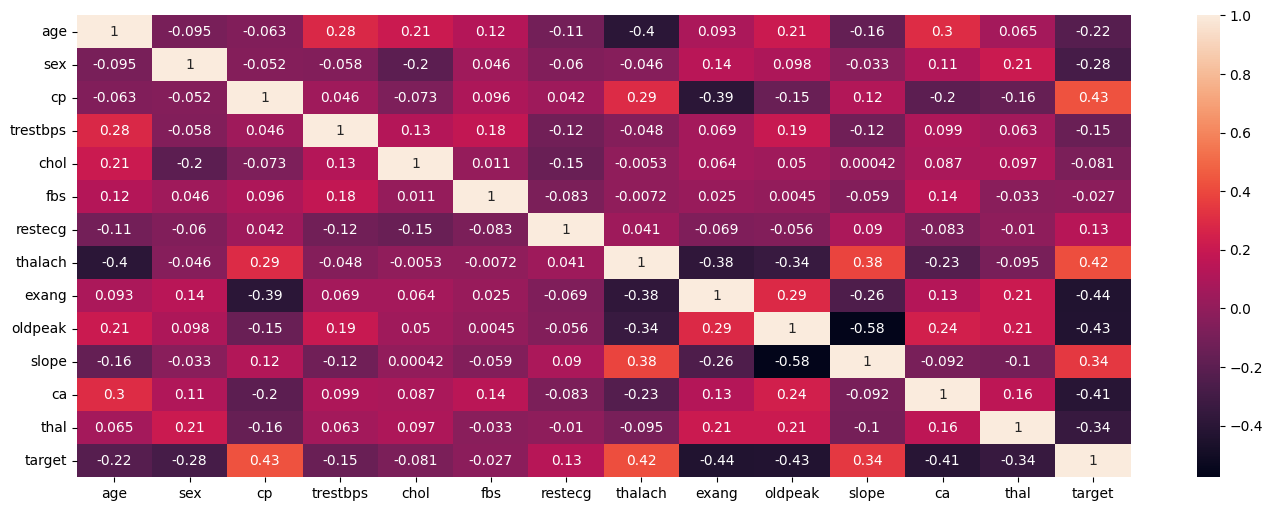

In [33]:
plt.figure(figsize = (17,6))
sns.heatmap(df.corr(),annot=True)

In [34]:
df.drop(['fbs','chol','trestbps'],axis=1,inplace=True) #droping column having less correlation

In [35]:
df

,age,sex,cp,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,1,168,0,1.0,2,2,3,0
1,53,1,0,0,155,1,3.1,0,0,3,0
2,70,1,0,1,125,1,2.6,0,0,3,0
3,61,1,0,1,161,0,0.0,2,1,3,0
4,62,0,0,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,0,115,0,1.5,1,0,2,1
733,44,0,2,1,175,0,0.6,1,0,2,1
739,52,1,0,1,161,1,0.0,2,1,3,0
843,59,1,3,0,125,0,0.0,2,0,2,0


In [36]:
x_train,x_test,y_train,y_test = train_test_split(df.drop('target',axis=1),df['target'],test_size=0.2,random_state=2)

In [37]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [42]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [43]:
y_predict = knn.predict(x_test)
accuracy_score(y_test,y_predict) #after droping column accuracy increased

0.8360655737704918

In [40]:
scores = []
for i in range(1,16):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_predict = knn.predict(x_test)
    scores.append(accuracy_score(y_test,y_predict))

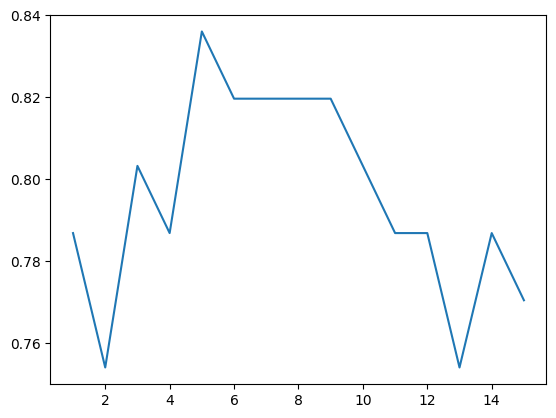

In [41]:
plt.plot(range(1,16),scores) #best k value was 5

In [66]:
knn = KNeighborsClassifier(n_neighbors=7,p=1)
knn.fit(x_train,y_train) #changing p value help with k = 7 and manhatten distance

KNeighborsClassifier(n_neighbors=7, p=1)

Maximum accuracy i got

In [67]:
y_predict = knn.predict(x_test)
accuracy_score(y_test,y_predict) #after droping column accuracy increased

0.8524590163934426